In [1]:
#  user_id:用户id，order_id:购买日期，order_products:购买产品数量，order_amount:购买金额

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')   #更改绘图风格，R语言绘图库风格

In [2]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')   #sep='\s+'  匹配任意空格
df.head()
#日期格式需要转换
#存在同一个用户在同一天重复购买两次的行为

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [6]:
df.describe()
#1,用户平均每笔订单2.4个商品，标准差2.3，稍微有点波动，属于正常，
#然而在75％分位数的时候，说明绝大多数订单都在2~3个
#2，购买金额，反映出大部分订单都是中小型订单，都在30~45之间

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [8]:
#数据预处理
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
#format参数：按照指定的格式去匹配想要转换的数据列
# %Y：四位的年份1994   %m：两位的月份05   %d：两位的天数31
# %y:两位的年份94   %h：两位的小时09    %M:两位的分钟15  %s:两位的秒
#将order_data转化为精度为月份的数据列
df['month'] = df['order_date'].astype('datetime64[M]')   #[M]  控制转换后的精度为月份
df

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
...,...,...,...,...,...,...
69654,23568,19970405,4,83.74,1997-04-05,1997-04-01
69655,23568,19970422,1,14.99,1997-04-22,1997-04-01
69656,23569,19970325,2,25.74,1997-03-25,1997-03-01
69657,23570,19970325,3,51.12,1997-03-25,1997-03-01


Text(0.5, 1.0, '每月的消费人数')

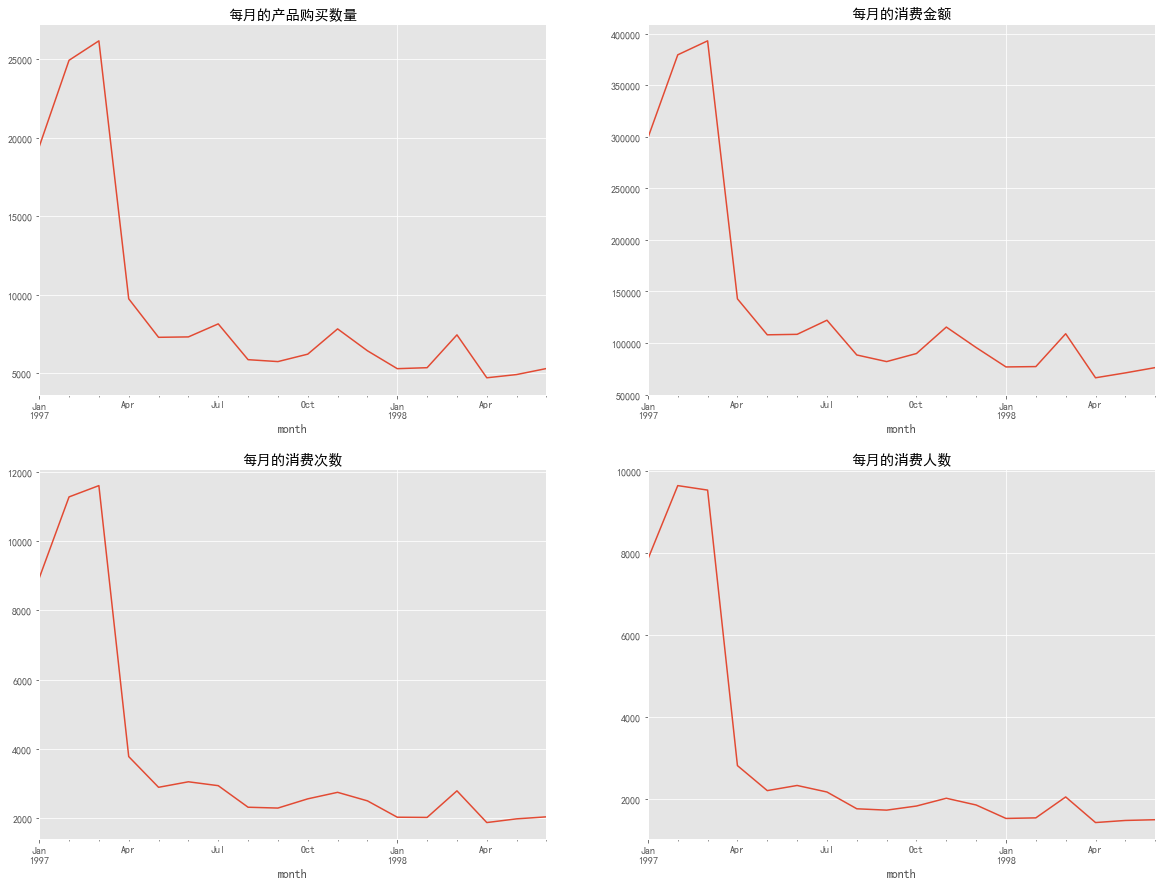

In [9]:
#用户整体消费趋势分析（按月份）
#按月份统计产品购买数量，消费金额，消费次数，消费人数    绘制子图！！！
plt.figure(figsize=(20,15))   #单位是英寸
#每月的产品购买数量
plt.subplot(221)  #两行两列，占据第一个位置
df.groupby(by='month')['order_products'].sum().plot()   #默认折线图
plt.title('每月的产品购买数量')
#每月的消费金额
plt.subplot(222)  #两行两列，占据第二个位置
df.groupby(by='month')['order_amount'].sum().plot()   #默认折线图
plt.title('每月的消费金额')
#每月的消费次数
plt.subplot(223)  #两行两列，占据第三个位置
df.groupby(by='month')['user_id'].count().plot()   #默认折线图
plt.title('每月的消费次数')
#每月的消费人数
plt.subplot(224)  #两行两列，占据第四个位置
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()   #默认折线图
plt.title('每月的消费人数')
#分析结果
#图一可以看出，前三个月销量非常高，而以后销量较为稳定，并且稍微有点下降趋势
#图二可以看出，依然前三个月消费金额比较高，与消费数量呈正比例关系，三月份过后下降严重，并呈现下降趋势
#思考问题所在，跟我们时间有关系，在我国123月份正处于春节前后。公司在123月份是否加大了营销力度
#图三可以看出，前三个月订单数在一万左右，后续的月份在2500左右的订单数。
#图四可以看出，前三个月消费人数在八千到一万这样，后续月份在2000不到
#总结：所以数据显示，97年前三个月消费事态异常，后续趋于常态化

In [10]:
#用户个体消费分析

In [11]:
#1、用户消费金额，消费次数（产品数量）描述统计

In [12]:
user_grouped = df.groupby(by='user_id').sum()
print(user_grouped.describe())
print('用户数量：',len(user_grouped))

#从用户的角度：用户数量23570，用户平均购买7个CD，但是中位数只有3，最大购买量到达了1033
#平均值大于中位数，属于典型右偏分布，消费金额数据同理。少部分用户占据了绝大多数消费

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量： 23570


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

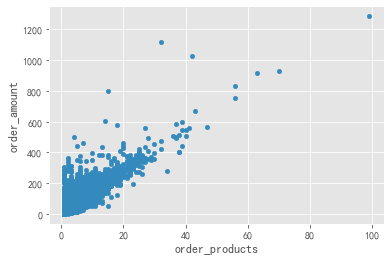

In [13]:
#绘制每个用户的产品的购买量和消费金额的散点图
df.plot(kind='scatter',x='order_products',y='order_amount')
#从图中可知，用户的消费金额与购买量呈线性趋势，每个商品的均价在15左右
#订单的极值点比较少(消费金额大于1000,购买量大于60的)，对于样本来说影响不大，可以忽略不计

In [14]:
#2、用户消费分布图

<AxesSubplot:xlabel='每个用户的购买数量', ylabel='Frequency'>

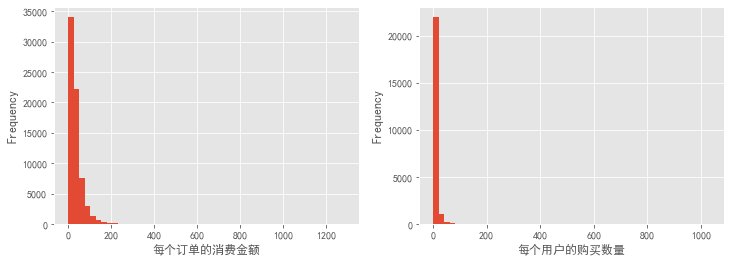

In [15]:
plt.figure(figsize=(12,4)) 
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=50)   #bins  区间分数  影响柱子的宽度，值越大，柱子越细
#消费金额在100以内的用户占据了绝大多数
plt.subplot(122)
plt.xlabel('每个用户的购买数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=50)
#由图二可知，每个用户的购买量很少，集中在50以内
#经过这两幅图，我们的用户主要是消费金额低并且购买量少于50的占据多数

In [16]:
#3、用户累计消费总金额占比分析（用户贡献度）

In [17]:
#进行用户分组，取出消费金额，进行求和汇总，排序，重置索引
user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [18]:
#每个用户消费金额累加
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [19]:
#消费金额宗旨
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x : x['amount_cumsum']/amount_total,axis=1)
user_cumsum.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


<AxesSubplot:>

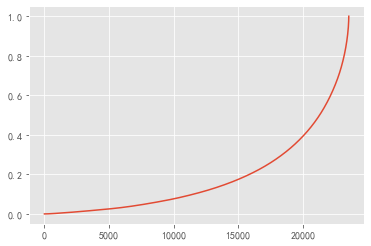

In [20]:
user_cumsum['prop'].plot()
#由图分析可知，前两万名用户贡献了百分之60金额。后3500名贡献了百分之40.

In [21]:
#用户消费行为

In [22]:
# 1、首购时间
#用户分组，取最小值，即为首购时间

<AxesSubplot:>

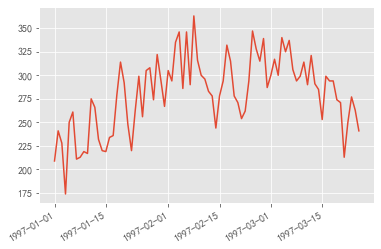

In [23]:
df.groupby(by='user_id')['order_date'].min().value_counts().plot()
#由图可知，首次购买的用户量在1月1号到2月10号，呈明显上升趋势，后续开始回落 
#猜测：有可能是公司产品的推广力度或者价格的调整

In [24]:
# 2、最后一次购买时间

<AxesSubplot:>

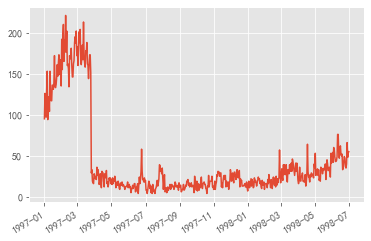

In [25]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()
#大多数用户最后一次购买时间集中在前三个月，说明缺少忠诚用户
#随着时间的推移，最后一次购买商品的用户呈上升趋势
#猜测：这份数据选择的是前三个月的用户在后面18个月的跟踪记录

用户分层

1，构建RFM模型

In [26]:
#透视表的使用（index：相当于groupby分组,values:取出的数据列，aggfunc:key值必须存在于values列中，必须跟随有效的聚合函数）
rfm = df.pivot_table(index='user_id',
                     values=['order_products','order_amount','order_date'],
                     aggfunc={
                        'order_date':'max', #最后一次购买
                        'order_products':'sum',  #每一个用户的购买总数量
                        'order_amount':'sum'     #消费总金额
                        })
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [27]:
#用每个用户的最后一次购买时间减去日期列的最大值，最后再转化成天数，保留一位小数。
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')  #取相差的天数，保留一位小数
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [28]:
#RFM计算方式：每一列数据减去数据所在列的平均值，有正有负，根据结果值与1作比较，如果≥1，设置为1，否则为0
# rfm['R']-rfm['R'].mean()
def rfm_func(x):     #x分别代表每一列数据
    level =x.apply(lambda x : '1' if x>=1 else '0')
    label = level['R']+level['F']+level['M']   
    d = {
         '111':'重要价值客户',
         '011':'重要保持客户',
         '101':'重要发展客户',
         '001':'重要挽留客户',
         '110':'一般价值客户',
         '010':'一般保持客户',
         '100':'一般发展客户',
         '000':'一般挽留客户'
    }
    result=d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


Text(0, 0.5, 'R')

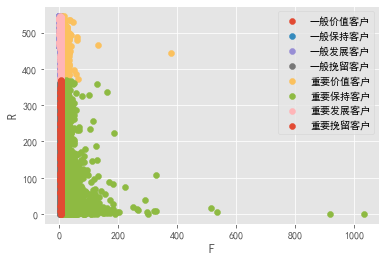

In [29]:
#用户分层可视化
for label,grouped in rfm.groupby(by='label'):
    x=grouped['F']   #单个用户的购买数量
    y=grouped['R']   #最近一次的购买时间与98年7月的相差天数
    plt.scatter(x,y,label=label)
plt.legend()    #显示图例
plt.xlabel('F')
plt.ylabel('R')

新老、活跃、回流用户分析

In [30]:
pivoted_counts = df.pivot_table(
                index='user_id',
                columns='month',
                values='order_dt',
                aggfunc='count'
).fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#由于浮点数并不直观，并且需要转成是否消费过即可，用0,1表示
df_purchase = pivoted_counts.applymap(lambda x :1 if x>0 else 0)
#apply:作用于dataframe数据中的一行或者一列数据
#applymap:作用于dataframe数据中的每一个元素
#map:本身是一个series的函数，在df结构中无法使用series函数，map函数作用于series中的每一个元素
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [32]:
#判断是否是新用户、活跃用户、不活跃用户、回流用户
def active_status(data):    # data:整行数据，共18列
    status = []   #负责存储18个月的状态：unreg/new/active/unactive/return
    for i in range(18):
        #本月没有消费==0
        if data[i] == 0:
            if len(status) == 0:   #前面没有任何记录（97年1月）
                status.append('unreg')
            else:   #开始判断上一个状态
                if status[i-1] == 'unreg':   #一直未消费过
                    status.append('unreg')
                else: # new/active/unactive/return
                    status.append('unactive')
         #本月有消费==1
        else:
            if len(status) == 0:   #前面没有任何记录（97年1月）
                status.append('new')
            else:    #开始判断上一个状态
                if status[i-1] == 'unactive':
                    status.append('renturn')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:   #new/active/return
                    status.append('active')
    return pd.Series(status,df_purchase.columns)    #值status，列名df_purchase中的列名                

purchase_states = df_purchase.apply(active_status,axis=1)   #得到用户分层结果
purchase_states.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,renturn,active,unactive,unactive,unactive,unactive,unactive,unactive,renturn,unactive,unactive,unactive,unactive,unactive,renturn,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,renturn,unactive,unactive,unactive,renturn,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,renturn,active,active,active,unactive,renturn,unactive,unactive,renturn,active,unactive,unactive,unactive,unactive,unactive


In [33]:
#用nan替换unreg
purchase_states_ct = purchase_states.replace('unreg',np.NaN).apply(lambda x : pd.value_counts(x),axis=0)
purchase_states_ct.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
renturn,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

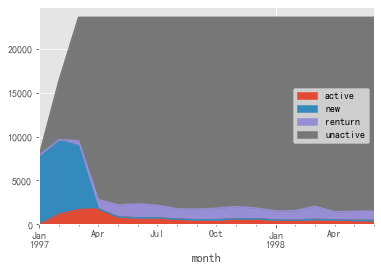

In [34]:
purchase_states_ct.T.fillna(0).plot.area()
#由图可知，前三个月红色活跃用户和蓝色新用户比较多、
#四月份过后，活跃用户和新用户逐渐减少，并趋于稳定
#回流用户主要产生在4月份以后，呈现稳定趋势，是网站的重要用户

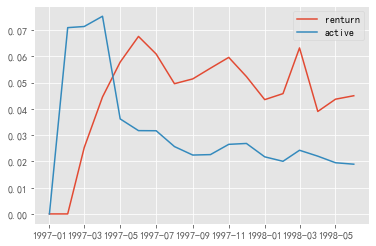

In [35]:
#回流,活跃用户的占比
rate = purchase_states_ct.T.fillna(0).apply(lambda x : x/x.sum(),axis=1)
plt.plot(rate['renturn'],label='renturn')
plt.plot(rate['active'],label='active')
plt.legend()
#前五个月回流用户呈上涨趋势，后续呈下降趋势，维持在5％比例
#活跃用户：前三个月活跃用户大量增长，猜测由于活动吸引来很多新用户所导致，5月份之后开始下降，平均维持在2.5％左右
#网站运营稳定之后，回流用户大于活跃用户

用户的购买周期

In [36]:
#shift函数，将数据移动到一定的位置
data1 = pd.DataFrame({
    'a':[0,1,2,3,4,5,],
    'b':[5,4,3,2,1,0]
    })
data1.shift(axis=0)   #整体向下移动一个位置，默认：axis=0
data1.shift(axis=1)   #整体向右移动一个位置

,a,b
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4
5,NaN,5


In [37]:
#计算购买周期（购买日期的时间差）
order_diff = df.groupby(by='user_id').apply(lambda x :x['order_date']-x['order_date'].shift())#当前订单-上一订单
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

<AxesSubplot:>

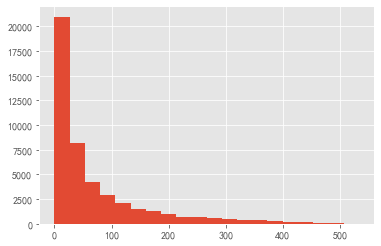

In [38]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)  #bins影响柱子的宽度  每个柱子的宽度=（最大值-最小值）/bins
#   得知：平均消费周期是68天
#    大多数消费周期低于100天
#  呈现典型的长尾分布，只有少部分用户消费周期大于200天（消费不活跃用户），可以赠送优惠券

用户的生命周期

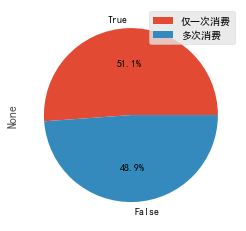

In [39]:
#计算方式：用户最后一次购买时间（max）-第一次购买时间(min)，如果差值为0，说明用户仅仅购买了一次 
user_life = df.groupby(by='user_id')['order_date'].agg(['min','max'])
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['仅一次消费','多次消费'])
#一半以上的用户仅仅消费了一次，说明用户留存率不好，运营不利

In [40]:
(user_life['max']-user_life['min']).describe()    #用户生命周期分析
#用户平均生命周期为134天，但是中位数=0，再次验证了大多数用户只消费了一次，低质量用户
#75％分位数以后的用户，生命周期＞294天，属于核心用户，需要着重维持
#前三个月的新用户数据，所以分析的事这些用户的生命周期

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

绘制所有用户的消费生命周期直方图＋多次消费

Text(0, 0.5, '用户人数')

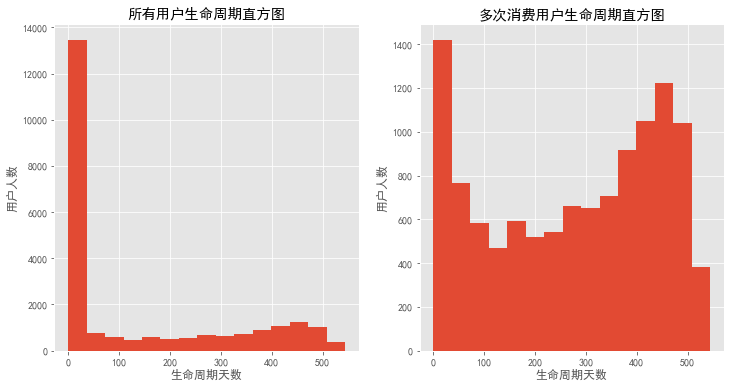

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')


plt.subplot(122)
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')
#对比可知，第二幅图过滤掉了生命周期等于0的用户，呈双峰结构
#虽然第二幅图中还有很多用户生命周期区域0天，但是比第一幅图好了很多
#虽然进行了多次消费，但是不能长期消费，依然属于普通用户，可针对进行营销推广活动
#少部分用户生命周期在300到500天，属于忠诚客户，需要大力度维持此类用户

复购率和回购率分析

复购率分析

<AxesSubplot:xlabel='month'>

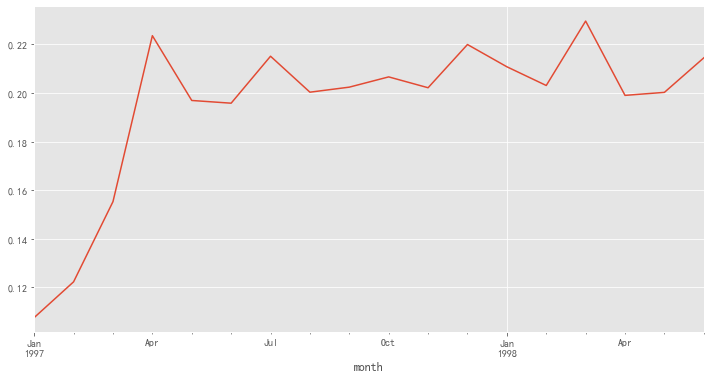

In [59]:
#计算方式，在一个自然月内，购买多次的用户在总的消费人数（在这个自然月）中的占比，若客户在同一天内消费多次也算复购
#消费者有三种：消费记录>=2次的；消费中人数，本月无消费用户
#复购用户：1     有消费但不是复购用户：0       自然月中没有消费的用户：NaN(不参与计数)
purchase_r=pivoted_counts.applymap(lambda x : 1 if x>1 else np.NaN if x==0 else 0)
purchase_r
#purchase_r.sum()   所有复购用户
#purchase_r.count()   所有参与购物的用户（NaN除外不参与计数）
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6)) 
#前三个月复购率开始上升，后续稳定维持在20％~22％之间
#分析前三个月复购率低的原因，可能是大批新用户仅仅购买一次

回购率分析

计算方式：在一个时间窗口内进行了消费，在下一个时间窗口又进行了消费，时间窗口是一个月

In [61]:
def purchase_back(data):
    status = []    #存储用户回购率状态
    # 回购用户：1     非回购用户（当前月消费了下个月未消费）：0     当前月未消费：NaN
    for i in range(17):
        #当前月消费了
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)   #回购用户
            if data[i+1]==0:       #下个月未消费
                status.append(0)   #非回购用户
       #当前月未消费
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,df_purchase.columns)
purchase_b=df_purchase.apply(purchase_back,axis=1)
purchase_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


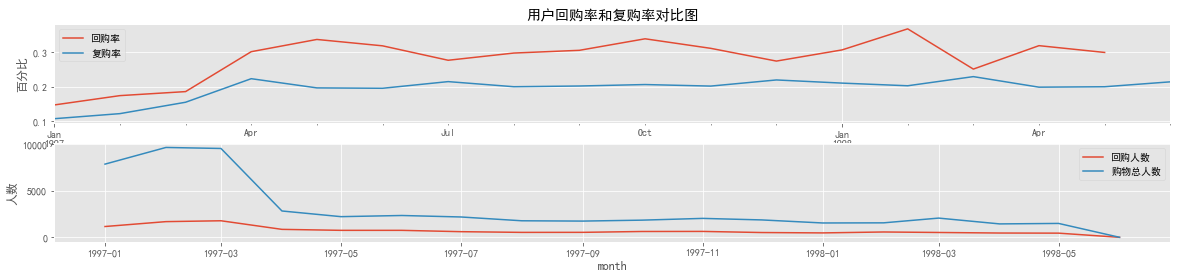

In [65]:
#回购率可视化
plt.figure(figsize=(20,4))
plt.subplot(211)
#回购率
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
#复购率
(purchase_r.sum()/purchase_r.count()).plot(label='复购率') 
plt.legend()
plt.ylabel('百分比')
plt.title('用户回购率和复购率对比图')
#由回购率可知，平稳后维持在30％左右，波动性较大
#复购率低于回购率，平稳后在20％左右，波动性较小
#前三个月，不论是回购还是复购，都呈上升趋势，说明新用户需要一定的时间变成复购或者回购用户
#结合新老用户分析，新客户忠诚度远低于老客户忠诚度



#回购人数和购物总人数
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物总人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()

#前三个月，购物总人数远远大于回购人数，主要是因为很多新用户在一月份进行了首次购买
#三个月后，回购人数和购物总人数区域稳定，回归人数稳定在1000左右，购物总人数稳定在2000左右